In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import font_manager, rc
import numpy as np
font_path = "C:/Windows/Fonts/H2GPRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import requests, json
import numpy as np

In [3]:
datas = {'userid':'feelwjd'}

In [4]:
user_routine_workout_res = requests.post("http://3.34.96.177:8000/api/user-routine-workout",data=datas).text
df_user_routine_workout = pd.read_json(user_routine_workout_res)
df_user_routine_workout

,UserRoutineWorkoutId,UserRoutineId,workoutid
0,1,5,1
1,2,5,21
2,3,5,22
3,4,5,24
4,5,5,65
...,...,...,...
2021,2160,626,24
2022,2161,626,65
2023,2162,627,274
2024,2163,627,278


In [5]:
routineinfo_res = requests.post("http://3.34.96.177:8000/api/routine-info",data=datas).text
df_routineinfo = pd.read_json(routineinfo_res)
df_routineinfo

,userid,routineid,UserRoutineId,RoutineDate,Time,workoutid,routinename,description,workoutname
0,feelwjd,1,1,2021-09-18T00:00:00.000Z,17:29:03,"1,2,3,4,5",feelwjd's routine,description,"싸이클,엘립티컬 머신,트레드밀 러닝,러닝,버피"
1,feelwjd,5,5,2021-09-24T00:00:00.000Z,23:39:55,"1,21,22,24,65,66",feelwjd,description,"싸이클,슬로우 버피,온몸 찢기,스쿼트 (바벨),스탠딩 레그 컬 (머신),시티드 카프..."
2,feelwjd,10,10,2021-09-24T00:00:00.000Z,23:39:55,"299,278,276,263,222,32,123,120",feelwjd,description,"리버스 리스트 컬 (덤벨),해머 컬 (덤벨),바이셉 컬 (덤벨),트라이셉 익스텐션 ..."
3,feelwjd,15,15,2021-09-24T00:00:00.000Z,23:39:55,"76,73,75,35,31",feelwjd,description,"와이드 스쿼트,원레그 레그프레스,힙 익스텐션 (머신),이너 싸이 머신,런지 (덤벨)"
4,feelwjd,20,20,2021-09-24T00:00:00.000Z,23:39:55,"92,218",feelwjd,description,"레그 레이즈,다이아몬드 푸쉬업"
...,...,...,...,...,...,...,...,...,...
573,feelwjd,625,623,2021-09-18T00:00:00.000Z,17:14:13,"274,278,66,272",feelwjd routine,For MyPT-AI Dataset,"친 업,해머 컬 (덤벨),시티드 카프레이즈 (머신),바이셉 컬 (바벨)"
574,feelwjd,626,624,2021-09-19T00:00:00.000Z,17:14:13,"144,274,66",feelwjd routine,For MyPT-AI Dataset,"데드리프트,친 업,시티드 카프레이즈 (머신)"
575,feelwjd,627,625,2021-09-20T00:00:00.000Z,17:14:13,"225,185,222,198",feelwjd routine,For MyPT-AI Dataset,"시티드 오버헤드 프레스,벤치 프레스,레터럴 레이즈 (덤벨),인클라인 벤치 프레스 (덤벨)"
576,feelwjd,628,626,2021-09-21T00:00:00.000Z,17:14:13,"24,65",feelwjd routine,For MyPT-AI Dataset,"스쿼트 (바벨),스탠딩 레그 컬 (머신)"


In [6]:
all_count_workoutid = df_user_routine_workout.index.stop
all_count_workoutid

2026

In [7]:
all_count_routine = df_routineinfo.index.stop
all_count_routine

578

In [8]:
routine_recommand_count = int(all_count_workoutid/all_count_routine)
routine_recommand_count

3

In [9]:
temp = []
for i in range(df_routineinfo.index.stop):
    aaa = map(int,df_routineinfo.workoutid[i].split(','))
    bbb = list(aaa)
    temp.append(bbb)
temp

[[1, 2, 3, 4, 5],
 [1, 21, 22, 24, 65, 66],
 [299, 278, 276, 263, 222, 32, 123, 120],
 [76, 73, 75, 35, 31],
 [92, 218],
 [3, 2, 1, 46, 98, 78],
 [32, 44, 66, 88, 99, 100],
 [31, 76, 73, 75, 35],
 [274, 148, 66, 231, 182],
 [197, 265, 274, 182, 231, 278, 66],
 [274, 148, 66, 231, 182],
 [197, 265, 274, 182, 231, 278, 66],
 [24, 75],
 [197, 91, 265, 225],
 [274, 182, 148, 231, 66],
 [197, 91, 265, 225, 24, 75, 26, 28],
 [274, 231, 182, 278, 66],
 [91, 222, 265, 225],
 [24, 26],
 [274, 66, 272, 158, 182],
 [197, 198, 265, 222, 269],
 [225, 265, 197, 91],
 [2, 4],
 [274, 182, 231, 148, 66],
 [197, 265, 222, 256],
 [274, 182, 231, 272, 66],
 [197, 265, 222, 24],
 [274, 154, 148, 231, 272],
 [197, 91, 265, 225],
 [24, 170, 26],
 [274, 66, 148, 272, 231, 182],
 [197, 225, 256, 91],
 [24, 65],
 [274, 231, 182, 272, 66],
 [91, 222, 265, 225],
 [24, 65],
 [197, 265, 198, 269, 222],
 [274, 154, 182, 272, 231, 66],
 [24, 65, 26, 1],
 [197, 265, 222, 185, 221],
 [274, 148, 66, 231, 278, 182],
 [24

In [10]:
np.array(temp[1])

array([ 1, 21, 22, 24, 65, 66])

In [11]:
#temp = np.array(temp)
#temp

In [91]:
workout_res = requests.post("http://3.34.187.120:8000/api/workout").text
df_workout = pd.read_json(workout_res)
df_workout

,workoutid,part,workoutname,workoutclass,label
0,1,유산소,싸이클,1,NaN
1,2,유산소,엘립티컬 머신,1,NaN
2,3,유산소,트레드밀 러닝,1,NaN
3,4,유산소,러닝,0,NaN
4,5,유산소,버피,0,NaN
...,...,...,...,...,...
294,295,전완근,리스트 컬 (덤벨),0,NaN
295,296,전완근,리스트 컬 (바벨),1,NaN
296,297,전완근,리스트 롤러,1,NaN
297,298,전완근,리버스 리스트 컬 (바벨),1,NaN


In [13]:
temp[2][0]

299

In [14]:
part_incoding_temp= []
for i in range(len(temp)):
    list_incoding = []
    for j in range(len(temp[i])):
        list_value = temp[i][j]
        list_incoding.append(df_workout.label[list_value-1])
    part_incoding_temp.append(list_incoding)
part_incoding_temp

[[nan, nan, nan, nan, nan],
 [nan, nan, nan, 11.0, 13.0, 15.0],
 [nan, nan, nan, nan, 42.0, 11.0, nan, 4.0],
 [14.0, 11.0, 11.0, 14.0, 11.0],
 [3.0, 24.0],
 [nan, nan, nan, 14.0, 1.0, 13.0],
 [11.0, 11.0, 15.0, 12.0, 4.0, nan],
 [11.0, 14.0, 11.0, 11.0, 14.0],
 [nan, 31.0, 15.0, 43.0, 32.0],
 [22.0, nan, nan, 32.0, 43.0, nan, 15.0],
 [nan, 31.0, 15.0, 43.0, 32.0],
 [22.0, nan, nan, 32.0, 43.0, nan, 15.0],
 [11.0, 11.0],
 [22.0, 11.0, nan, 41.0],
 [nan, 32.0, 31.0, 43.0, 15.0],
 [22.0, 11.0, nan, 41.0, 11.0, 11.0, 11.0, 11.0],
 [nan, 43.0, 32.0, nan, 15.0],
 [11.0, 42.0, nan, 41.0],
 [11.0, 11.0],
 [nan, 15.0, nan, 32.0, 32.0],
 [22.0, 22.0, nan, 42.0, nan],
 [41.0, nan, 22.0, 11.0],
 [nan, nan],
 [nan, 32.0, 43.0, 31.0, 15.0],
 [22.0, nan, 42.0, nan],
 [nan, 32.0, 43.0, nan, 15.0],
 [22.0, nan, 42.0, 11.0],
 [nan, 31.0, 31.0, 43.0, nan],
 [22.0, 11.0, nan, 41.0],
 [11.0, 34.0, 11.0],
 [nan, 15.0, 31.0, nan, 43.0, 32.0],
 [22.0, 41.0, nan, 11.0],
 [11.0, 13.0],
 [nan, 43.0, 32.0, nan, 1

In [15]:
part_incoding= []
for i in range(len(part_incoding_temp)):
    list_incoding = []
    for j in range(len(part_incoding_temp[i])):
        list_value = part_incoding_temp[i][j]
        if(np.isnan(list_value)):
            list_incoding.append(0)
        else:
            list_incoding.append(list_value)
    part_incoding.append(list_incoding)
part_incoding

[[0, 0, 0, 0, 0],
 [0, 0, 0, 11.0, 13.0, 15.0],
 [0, 0, 0, 0, 42.0, 11.0, 0, 4.0],
 [14.0, 11.0, 11.0, 14.0, 11.0],
 [3.0, 24.0],
 [0, 0, 0, 14.0, 1.0, 13.0],
 [11.0, 11.0, 15.0, 12.0, 4.0, 0],
 [11.0, 14.0, 11.0, 11.0, 14.0],
 [0, 31.0, 15.0, 43.0, 32.0],
 [22.0, 0, 0, 32.0, 43.0, 0, 15.0],
 [0, 31.0, 15.0, 43.0, 32.0],
 [22.0, 0, 0, 32.0, 43.0, 0, 15.0],
 [11.0, 11.0],
 [22.0, 11.0, 0, 41.0],
 [0, 32.0, 31.0, 43.0, 15.0],
 [22.0, 11.0, 0, 41.0, 11.0, 11.0, 11.0, 11.0],
 [0, 43.0, 32.0, 0, 15.0],
 [11.0, 42.0, 0, 41.0],
 [11.0, 11.0],
 [0, 15.0, 0, 32.0, 32.0],
 [22.0, 22.0, 0, 42.0, 0],
 [41.0, 0, 22.0, 11.0],
 [0, 0],
 [0, 32.0, 43.0, 31.0, 15.0],
 [22.0, 0, 42.0, 0],
 [0, 32.0, 43.0, 0, 15.0],
 [22.0, 0, 42.0, 11.0],
 [0, 31.0, 31.0, 43.0, 0],
 [22.0, 11.0, 0, 41.0],
 [11.0, 34.0, 11.0],
 [0, 15.0, 31.0, 0, 43.0, 32.0],
 [22.0, 41.0, 0, 11.0],
 [11.0, 13.0],
 [0, 43.0, 32.0, 0, 15.0],
 [11.0, 42.0, 0, 41.0],
 [11.0, 13.0],
 [22.0, 0, 22.0, 0, 42.0],
 [0, 31.0, 32.0, 0, 43.0, 15.0],

In [16]:
class_incoding= []
for i in range(len(temp)):
    list_incoding = []
    for j in range(len(temp[i])):
        if (np.isnan(part_incoding_temp[i][j])):
            list_value = part_incoding_temp[i][j]
            next
        else:
            list_value = temp[i][j]
            list_incoding.append(df_workout.workoutclass[list_value-1])
    class_incoding.append(list_incoding)
class_incoding

[[],
 [1, 1, 1],
 [0, 1, 0],
 [0, 1, 1, 1, 0],
 [0, 0],
 [0, 0, 0],
 [1, 1, 1, 0, 0],
 [0, 0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1],
 [1, 0, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1],
 [1, 1, 1],
 [0, 0, 1],
 [1, 1],
 [1, 1, 1],
 [1, 0, 0],
 [1, 1, 0],
 [],
 [1, 1, 1, 1],
 [1, 0],
 [1, 1, 1],
 [1, 0, 1],
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 0],
 [1, 1],
 [1, 1, 1],
 [0, 0, 1],
 [1, 1],
 [1, 0, 0],
 [0, 1, 1, 1],
 [1, 1, 1],
 [1, 0, 1, 0],
 [1, 1, 1, 1],
 [1, 1],
 [1, 1],
 [0, 0, 1, 1, 0],
 [1, 1, 1, 1],
 [],
 [1, 0],
 [1, 1],
 [],
 [0, 0, 1],
 [],
 [],
 [1, 0, 1],
 [1, 0],
 [1, 1, 1],
 [1, 1],
 [0, 1],
 [1, 1, 1, 1],
 [1, 1],
 [1, 0],
 [1],
 [1],
 [1, 1, 1, 1],
 [1],
 [1],
 [0, 1, 0, 1],
 [1, 0, 0, 1, 1, 1, 1],
 [1, 1],
 [1, 0, 1],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1],
 [0, 0, 1],
 [0, 1],
 [1, 0, 1],
 [],
 [1],
 [1, 1, 0, 1, 1],
 [1, 0, 0, 1],
 [1, 1, 1],
 [],
 [],
 [],
 [1],
 [1, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1],
 [

In [17]:
np.array(class_incoding[1]).size

3

In [18]:
np.array(class_incoding[2]).sum()

1

In [19]:
#print(np.array(part_incoding))

In [20]:
#part_incoding[0]

In [21]:
part_label = []

In [22]:
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	3	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	3	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	2	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	4	]	)
part_label.append(	[	3	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	3	]	)
part_label.append(	[	0	]	)
part_label.append(	[	4	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	2	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)
part_label.append(	[	0	]	)
part_label.append(	[	1	]	)
part_label.append(	[	0	]	)


In [23]:
part_label

[[0],
 [1],
 [4],
 [1],
 [0],
 [1],
 [1],
 [1],
 [3],
 [0],
 [3],
 [0],
 [1],
 [0],
 [3],
 [1],
 [0],
 [0],
 [1],
 [3],
 [2],
 [0],
 [0],
 [3],
 [0],
 [0],
 [0],
 [3],
 [0],
 [1],
 [3],
 [0],
 [0],
 [0],
 [4],
 [0],
 [2],
 [3],
 [1],
 [4],
 [3],
 [0],
 [0],
 [4],
 [3],
 [0],
 [0],
 [0],
 [0],
 [4],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [3],
 [0],
 [2],
 [3],
 [2],
 [0],
 [2],
 [2],
 [1],
 [4],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [4],
 [0],
 [0],
 [0],
 [1],
 [0],
 [4],
 [1],
 [0],
 [0],
 [0],
 [3],
 [4],
 [1],
 [4],
 [0],
 [0],
 [4],
 [4],
 [0],
 [0],
 [0],
 [4],
 [0],
 [1],
 [4],
 [0],
 [3],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [3],
 [0],
 [0],
 [4],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [4],
 [3],
 [0],
 [0],
 [0],
 [0],
 [4],
 [1],
 [4],
 [0],
 [1],
 [3],
 [4],
 [1],
 [2],
 [1],
 [0],
 [3],
 [1],
 [4],
 [3],
 [1],
 [4],
 [4],
 [3],
 [1],
 [4],
 [3],
 [0],
 [2],
 [3],
 [1],
 [4],
 [3],
 [1],
 [2],
 [3],
 [4],
 [1],
 [3],
 [2],
 [1],
 [0],
 [4],
 [1],
 [0],
 [1]

In [24]:
part_label_np = np.array(part_label)
part_label_np 

array([[0],
       [1],
       [4],
       [1],
       [0],
       [1],
       [1],
       [1],
       [3],
       [0],
       [3],
       [0],
       [1],
       [0],
       [3],
       [1],
       [0],
       [0],
       [1],
       [3],
       [2],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [3],
       [0],
       [1],
       [3],
       [0],
       [0],
       [0],
       [4],
       [0],
       [2],
       [3],
       [1],
       [4],
       [3],
       [0],
       [0],
       [4],
       [3],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [2],
       [3],
       [2],
       [0],
       [2],
       [2],
       [1],
       [4],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [4],
       [0],
       [0],
       [0],
       [1],
       [0],
       [4],
       [1],
       [0],
       [0],
    

In [25]:
for i,c in enumerate(part_incoding):
    print("{} = {} 라벨".format(c, part_label_np[i]))
    

[0, 0, 0, 0, 0] = [0] 라벨
[0, 0, 0, 11.0, 13.0, 15.0] = [1] 라벨
[0, 0, 0, 0, 42.0, 11.0, 0, 4.0] = [4] 라벨
[14.0, 11.0, 11.0, 14.0, 11.0] = [1] 라벨
[3.0, 24.0] = [0] 라벨
[0, 0, 0, 14.0, 1.0, 13.0] = [1] 라벨
[11.0, 11.0, 15.0, 12.0, 4.0, 0] = [1] 라벨
[11.0, 14.0, 11.0, 11.0, 14.0] = [1] 라벨
[0, 31.0, 15.0, 43.0, 32.0] = [3] 라벨
[22.0, 0, 0, 32.0, 43.0, 0, 15.0] = [0] 라벨
[0, 31.0, 15.0, 43.0, 32.0] = [3] 라벨
[22.0, 0, 0, 32.0, 43.0, 0, 15.0] = [0] 라벨
[11.0, 11.0] = [1] 라벨
[22.0, 11.0, 0, 41.0] = [0] 라벨
[0, 32.0, 31.0, 43.0, 15.0] = [3] 라벨
[22.0, 11.0, 0, 41.0, 11.0, 11.0, 11.0, 11.0] = [1] 라벨
[0, 43.0, 32.0, 0, 15.0] = [0] 라벨
[11.0, 42.0, 0, 41.0] = [0] 라벨
[11.0, 11.0] = [1] 라벨
[0, 15.0, 0, 32.0, 32.0] = [3] 라벨
[22.0, 22.0, 0, 42.0, 0] = [2] 라벨
[41.0, 0, 22.0, 11.0] = [0] 라벨
[0, 0] = [0] 라벨
[0, 32.0, 43.0, 31.0, 15.0] = [3] 라벨
[22.0, 0, 42.0, 0] = [0] 라벨
[0, 32.0, 43.0, 0, 15.0] = [0] 라벨
[22.0, 0, 42.0, 11.0] = [0] 라벨
[0, 31.0, 31.0, 43.0, 0] = [3] 라벨
[22.0, 11.0, 0, 41.0] = [0] 라벨
[11.0, 34.0, 11

In [26]:
aa = np.array(part_incoding[1])
len(aa)

6

In [27]:
part_np = []
for i in range(len(part_incoding)):
    aa = np.array(part_incoding[i])
    #bb = aa[~np.isnan(aa)]
    bb = np.pad(aa,(0,13-len(aa)),mode='constant',constant_values=0).reshape(13)           
    part_np.append(bb)
part_np = np.array(part_np)
part_np

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [41., 21., 42., ...,  0.,  0.,  0.],
       [11., 13.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [28]:
#part_label_np = []
#for i in range(len(part_label)):
#    aa = np.array(part_label[i])
#    #bb = np.pad(aa,(0,15-len(part_label[i])),mode='constant',constant_values=aa).reshape(15)           
#    part_label_np.append(aa)
#part_label_np
#part_label_np = np.array(part_label_np)
#part_label_np

In [29]:
#part_label_np = np.array(part_label)
#part_label_np

In [30]:
for i,c in enumerate(part_np):
    print("{} = {}".format(c, part_label_np[i]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] = [0]
[ 0.  0.  0. 11. 13. 15.  0.  0.  0.  0.  0.  0.  0.] = [1]
[ 0.  0.  0.  0. 42. 11.  0.  4.  0.  0.  0.  0.  0.] = [4]
[14. 11. 11. 14. 11.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[ 3. 24.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [0]
[ 0.  0.  0. 14.  1. 13.  0.  0.  0.  0.  0.  0.  0.] = [1]
[11. 11. 15. 12.  4.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[11. 14. 11. 11. 14.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[ 0. 31. 15. 43. 32.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[22.  0.  0. 32. 43.  0. 15.  0.  0.  0.  0.  0.  0.] = [0]
[ 0. 31. 15. 43. 32.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[22.  0.  0. 32. 43.  0. 15.  0.  0.  0.  0.  0.  0.] = [0]
[11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[22. 11.  0. 41.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [0]
[ 0. 32. 31. 43. 15.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[22. 11.  0. 41. 11. 11. 11. 11.  0.  0.  0.  0.  0.] = [1]
[ 0. 43. 32.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.]

[22. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [2]
[11. 11. 31. 11. 13.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[ 0. 31. 32.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[41. 21.  0. 42.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [4]
[11. 11. 31. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[22. 22. 41. 42.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [0]
[ 0. 43. 31. 32. 31.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[11. 31. 11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[41. 21.  0. 42.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [4]
[ 0. 31. 32. 31. 43.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [1]
[22. 42.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [2]
[ 0. 32.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[41. 21.  0. 42.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [4]
[ 0. 31. 32.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [3]
[11. 31.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] = [0]
[22.  0. 22.  0.  0.  0.  0.  0.  0.  0.

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [32]:
from sklearn.model_selection import train_test_split
train_list, test_list, train_labels, test_labels = train_test_split(part_np, part_label_np, test_size=0.2)

In [33]:
train_list.shape

(462, 13)

In [34]:
train_labels.shape

(462, 1)

In [35]:
test_list.shape

(116, 13)

In [36]:
test_labels.shape

(116, 1)

In [37]:
part_np.shape

(578, 13)

In [38]:
part_label_np.shape

(578, 1)

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_list,train_labels,epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 4.6725 - accuracy: 0.2208
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 2.4139 - accuracy: 0.1905
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.6328 - accuracy: 0.3247
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1.4232 - accuracy: 0.4654
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1.2843 - accuracy: 0.5736
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 1.2053 - accuracy: 0.5909
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1473 - accuracy: 0.6407
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0836 - accuracy: 0.6645
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0583 - accuracy: 0.6797
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0109 - accuracy: 0.6991
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 0.9199
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.9134
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.9264
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.9351
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.9242
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.9416
Epoch 89/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8983
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9156
Epoch 91/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.9264
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.9286
Epoch 93/100


In [40]:
history = model.fit(train_list,train_labels,epochs = 100, verbose=False)

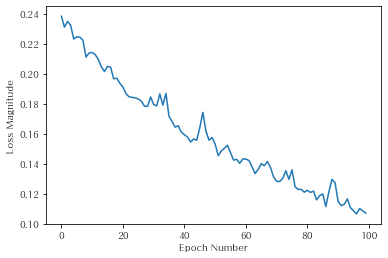

In [41]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
plt.show()

In [42]:
predictions = model.predict(test_list)

In [44]:
np.argmax(predictions[13])

2

In [45]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [46]:
part_model = create_model()

In [47]:
part_model.fit(train_list,train_labels,epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 4.6025 - accuracy: 0.2576
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 2.3842 - accuracy: 0.3225
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.7573 - accuracy: 0.4610
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1.4341 - accuracy: 0.5325
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1.2828 - accuracy: 0.5844
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1846 - accuracy: 0.6169
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1199 - accuracy: 0.6082
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0819 - accuracy: 0.6515
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0429 - accuracy: 0.6342
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0078 - accuracy: 0.7121
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.9242
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.9394
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.9416
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2712 - accuracy: 0.9416
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.9437
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2721 - accuracy: 0.9329
Epoch 89/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.9481
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.9437
Epoch 91/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.9416
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.9545
Epoch 93/100


In [48]:
part_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 2,437
Trainable params: 2,437
Non-trainable params: 0
_________________________________________________________________


In [49]:
part_model.save('saved_model/part_model')

INFO:tensorflow:Assets written to: saved_model/part_model\assets


In [50]:
export_dir = "saved_model/part_model"
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
open("part_model.tflite", "wb").write(tflite_model)

11044

In [ ]:
#part_model.predict

In [51]:
len(part_np[2])

13

In [52]:
part_incoding

[[0, 0, 0, 0, 0],
 [0, 0, 0, 11.0, 13.0, 15.0],
 [0, 0, 0, 0, 42.0, 11.0, 0, 4.0],
 [14.0, 11.0, 11.0, 14.0, 11.0],
 [3.0, 24.0],
 [0, 0, 0, 14.0, 1.0, 13.0],
 [11.0, 11.0, 15.0, 12.0, 4.0, 0],
 [11.0, 14.0, 11.0, 11.0, 14.0],
 [0, 31.0, 15.0, 43.0, 32.0],
 [22.0, 0, 0, 32.0, 43.0, 0, 15.0],
 [0, 31.0, 15.0, 43.0, 32.0],
 [22.0, 0, 0, 32.0, 43.0, 0, 15.0],
 [11.0, 11.0],
 [22.0, 11.0, 0, 41.0],
 [0, 32.0, 31.0, 43.0, 15.0],
 [22.0, 11.0, 0, 41.0, 11.0, 11.0, 11.0, 11.0],
 [0, 43.0, 32.0, 0, 15.0],
 [11.0, 42.0, 0, 41.0],
 [11.0, 11.0],
 [0, 15.0, 0, 32.0, 32.0],
 [22.0, 22.0, 0, 42.0, 0],
 [41.0, 0, 22.0, 11.0],
 [0, 0],
 [0, 32.0, 43.0, 31.0, 15.0],
 [22.0, 0, 42.0, 0],
 [0, 32.0, 43.0, 0, 15.0],
 [22.0, 0, 42.0, 11.0],
 [0, 31.0, 31.0, 43.0, 0],
 [22.0, 11.0, 0, 41.0],
 [11.0, 34.0, 11.0],
 [0, 15.0, 31.0, 0, 43.0, 32.0],
 [22.0, 41.0, 0, 11.0],
 [11.0, 13.0],
 [0, 43.0, 32.0, 0, 15.0],
 [11.0, 42.0, 0, 41.0],
 [11.0, 13.0],
 [22.0, 0, 22.0, 0, 42.0],
 [0, 31.0, 32.0, 0, 43.0, 15.0],

In [53]:
#aa = np.array(part_incoding[1])
#aa = np.pad(aa,(0,13-len(aa)),mode='constant',constant_values=0).reshape(13)
#aa.shape

In [54]:
np.argmax(part_model.predict(part_np)[2])

4

In [55]:
#np.argmax(part_model.predict(aa))

In [56]:
#test = []
#test.append([1])
#test

In [84]:
part_hot= []
part_hot_label = []
for i in range(len(part_incoding)):
    list_incoding = []
    list_score = np.argmax(part_model.predict(part_np)[i])
    part_hot_label.append(list_score)
    for j in range(len(part_incoding[i])):
        if(list_score==1):
            if(10<=part_incoding[i][j]<20):
                list_value = part_incoding[i][j] -10
            else:
                list_value = 0
        elif(list_score==2):
            if(20<=part_incoding[i][j]<30):
                list_value = part_incoding[i][j] -20
            else:
                list_value = 0
        elif(list_score==3):
            if(30<=part_incoding[i][j]<40):
                list_value = part_incoding[i][j] -30
            else:
                list_value = 0
        elif(list_score==4):
            if(40<=part_incoding[i][j]<50):
                list_value = part_incoding[i][j] -40
            else:
                list_value = 0
        else:
            list_value=0
        list_incoding.append(list_value)
    part_hot.append(list_incoding)
part_hot

[[0, 0, 0, 0, 0],
 [0, 0, 0, 1.0, 3.0, 5.0],
 [0, 0, 0, 0, 2.0, 0, 0, 0],
 [4.0, 1.0, 1.0, 4.0, 1.0],
 [0, 0],
 [0, 0, 0, 4.0, 0, 3.0],
 [1.0, 1.0, 5.0, 2.0, 0, 0],
 [1.0, 4.0, 1.0, 1.0, 4.0],
 [0, 1.0, 0, 0, 2.0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 1.0, 0, 0, 2.0],
 [0, 0, 0, 0, 0, 0, 0],
 [1.0, 1.0],
 [0, 0, 0, 0],
 [0, 2.0, 1.0, 0, 0],
 [0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0],
 [1.0, 1.0],
 [0, 0, 0, 2.0, 2.0],
 [2.0, 2.0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0],
 [0, 2.0, 0, 1.0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 1.0, 1.0, 0, 0],
 [0, 0, 0, 0],
 [1.0, 0, 1.0],
 [0, 0, 1.0, 0, 0, 2.0],
 [0, 1.0, 0, 0],
 [1.0, 3.0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0],
 [1.0, 3.0],
 [2.0, 0, 2.0, 0, 0],
 [0, 1.0, 2.0, 0, 0, 0],
 [1.0, 3.0, 1.0, 0],
 [0, 0, 2.0, 0, 1.0],
 [0, 1.0, 0, 0, 0, 2.0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 2.0, 0, 0, 1.0, 1.0],
 [0, 2.0, 1.0, 0, 0, 0, 0],
 [0, 0],
 [0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0],
 [2.0, 0, 0, 1.0],
 [0, 0],
 [0, 0],
 [0, 0, 0, 

In [85]:
part_hot_label

[0,
 1,
 4,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 3,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 1,
 3,
 4,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 4,
 3,
 0,
 0,
 4,
 3,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 3,
 2,
 0,
 2,
 2,
 1,
 4,
 1,
 1,
 0,
 1,
 1,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 4,
 1,
 0,
 0,
 0,
 3,
 4,
 1,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 3,
 0,
 0,
 0,
 0,
 4,
 1,
 3,
 0,
 1,
 3,
 4,
 1,
 2,
 1,
 0,
 3,
 1,
 4,
 3,
 1,
 4,
 4,
 3,
 1,
 4,
 3,
 0,
 2,
 3,
 1,
 4,
 3,
 1,
 2,
 3,
 4,
 1,
 3,
 2,
 1,
 0,
 4,
 1,
 0,
 1,
 4,
 4,
 4,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 4,
 1,
 0,
 2,
 0,
 4,
 0,
 1,
 2,
 3,
 1,
 4,
 0,
 1,
 2,
 3,
 0,
 4,
 3,
 1,
 0,
 0,
 0,
 4,
 0,
 1,
 0,
 3,
 4,
 1,
 2,
 0,
 2,
 3,
 4,
 4,
 1,
 1,
 4,
 0,
 2,
 3,
 1,
 4,
 0,
 0,
 1,
 1,
 4,
 0,
 0,
 0,
 1,
 4,
 1,
 4,
 0,
 4,
 3,
 0,
 0,
 3,
 2,
 1,
 4,
 4,
 1,
 0,
 0,
 0,
 0,
 1,


In [68]:
part_score_list = []
for i in range(len(part_hot)):
    part_score=[]
    for j in range(len(part_hot[i])):
        if(part_hot[i][j]==0):
            continue
        else:
            list_value = part_hot[i][j]
            part_score.append(list_value)
    temp = np.array(part_score)
    part_score_list.append(temp)
part_score_list


[array([], dtype=float64),
 array([1., 3., 5.]),
 array([2.]),
 array([4., 1., 1., 4., 1.]),
 array([], dtype=float64),
 array([4., 3.]),
 array([1., 1., 5., 2.]),
 array([1., 4., 1., 1., 4.]),
 array([1., 2.]),
 array([], dtype=float64),
 array([1., 2.]),
 array([], dtype=float64),
 array([1., 1.]),
 array([], dtype=float64),
 array([2., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([1., 1.]),
 array([2., 2.]),
 array([2., 2.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([2., 1.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([1., 1.]),
 array([], dtype=float64),
 array([1., 1.]),
 array([1., 2.]),
 array([1.]),
 array([1., 3.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([1., 3.]),
 array([2., 2.]),
 array([1., 2.]),
 array([1., 3., 1.]),
 array([2., 1.]),
 array([1., 2.]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([2., 1., 1.]),
 array(

In [72]:
part_score_list[1].sum()

9.0

In [78]:
part_weight = []
for i in range(len(part_score_list)):
    sum_value = part_score_list[i].sum()
    div_value = part_score_list[i].size
    weight = sum_value/div_value
    part_weight.append(weight)
part_weight

C:\Users\feelw\anaconda3\envs\fitness\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


[nan,
 3.0,
 2.0,
 2.2,
 nan,
 3.5,
 2.25,
 2.2,
 1.5,
 nan,
 1.5,
 nan,
 1.0,
 nan,
 1.5,
 1.0,
 nan,
 nan,
 1.0,
 2.0,
 2.0,
 nan,
 nan,
 1.5,
 nan,
 nan,
 nan,
 1.0,
 nan,
 1.0,
 1.5,
 1.0,
 2.0,
 nan,
 nan,
 2.0,
 2.0,
 1.5,
 1.6666666666666667,
 1.5,
 1.5,
 nan,
 nan,
 1.3333333333333333,
 1.5,
 nan,
 nan,
 nan,
 nan,
 1.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 nan,
 1.5,
 nan,
 nan,
 2.0,
 2.0,
 nan,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 nan,
 1.6666666666666667,
 1.6666666666666667,
 nan,
 1.5,
 nan,
 nan,
 nan,
 3.0,
 nan,
 1.0,
 1.0,
 nan,
 nan,
 nan,
 2.0,
 1.6666666666666667,
 1.0,
 1.5,
 nan,
 nan,
 1.5,
 3.0,
 nan,
 nan,
 nan,
 3.0,
 nan,
 1.0,
 nan,
 1.0,
 1.5,
 nan,
 nan,
 nan,
 nan,
 1.0,
 nan,
 1.0,
 nan,
 nan,
 3.0,
 nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0,
 1.5,
 nan,
 nan,
 nan,
 nan,
 1.0,
 5.0,
 1.0,
 nan,
 1.0,
 1.5,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 nan,
 1.5,
 1.6666666666666667,
 1.5,
 1.25,
 1.5,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 1

In [79]:
part_weight_np = []
for i in range(len(part_weight)):
    if(np.isnan(part_weight[i])):
        part_weight_np.append(0)
    else:
        part_weight_np.append(int(part_weight[i]))
part_weight_np

[0,
 3,
 2,
 2,
 0,
 3,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 5,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 3,
 5,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 5,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [83]:
df_workout.dropna()

,workoutid,part,workoutname,workoutclass,label
23,24,하체,스쿼트 (바벨),1,11.0
24,25,하체,런지,0,11.0
25,26,하체,레그 프레스,1,11.0
26,27,하체,러그 컬,1,13.0
27,28,하체,스티프 레그 데드리프트 (바벨),1,11.0
...,...,...,...,...,...
250,251,어깨,암 워킹 푸쉬업,0,41.0
251,252,어깨,플로어 인버티드 숄더프레스,1,41.0
252,253,어깨,비하인드 넥 프레스 (덤벨),0,41.0
253,254,어깨,플랭크 레터럴 레이즈,0,42.0
